In [99]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [16]:
#Importing the dataset
dataframe = pd.read_csv(r"C:\Users\AKASH\OneDrive\Desktop\python\archive (7)\Telco-Customer-Churn.csv")
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
dataframe.shape

(7043, 21)

In [18]:
#Dropping the Unnecessary Columns
dataframe.drop(columns = ['customerID'],inplace = True)
dataframe.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that the TotalCharges column is object. We need to investigate that.

In [20]:
dataframe['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [26]:
dataframe_modified = dataframe[dataframe['TotalCharges'] != " "]

In [27]:
dataframe_modified.shape

(7032, 20)

We lost 11 rows which is alright!

In [29]:
dataframe_modified = dataframe_modified.astype({'TotalCharges' : 'float64'})

In [30]:
dataframe_modified.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Hurray!! We did it.

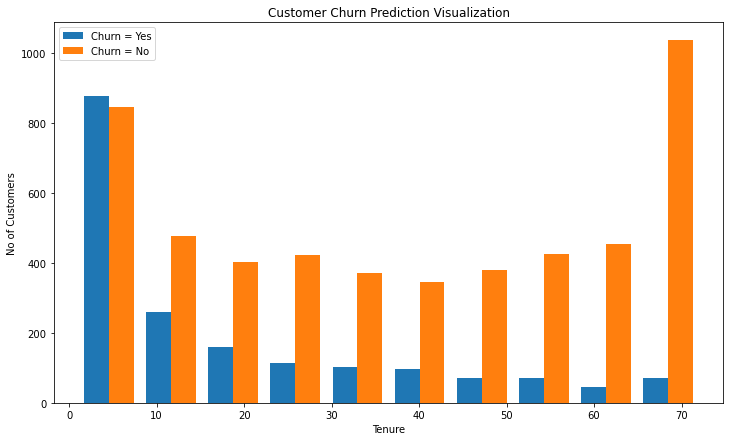

In [37]:
plt.figure(figsize = (12,7))
tenure_churn_yes = dataframe_modified[dataframe_modified['Churn'] == 'Yes']['tenure']
tenure_churn_no = dataframe_modified[dataframe_modified['Churn'] == 'No']['tenure']

plt.xlabel('Tenure')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes,tenure_churn_no],label = ["Churn = Yes","Churn = No"])
plt.legend()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

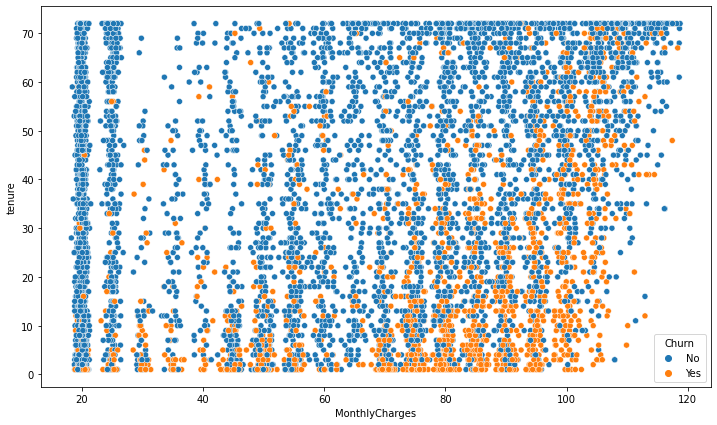

In [47]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'MonthlyCharges',y = 'tenure',data = dataframe_modified,hue = 'Churn')

People with high tenure stay in the comapny even if the monthly charges are high.

In [66]:
def extract_unique_values(df):
    arr1 = []
    for i in df:
        if df[i].dtypes == 'object':
            print(f'{i} : {df[i].unique()}')
                 
        

In [67]:
extract_unique_values(dataframe_modified)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Values like No phone Service, No Internet Service can be simply replaced with No.

In [53]:
dataframe_modified.replace('No phone service','No',inplace = True)

In [59]:
dataframe_modified.replace('No internet service','No',inplace = True)

In [68]:
extract_unique_values(dataframe_modified)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [69]:
object_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [70]:
#Label Encoding
for i in object_columns:
    dataframe_modified[i].replace({'Yes' : 1,'No' : 0},inplace =True)

In [73]:
#One Hot Encoding
dataframe_modified_final = pd.get_dummies(dataframe_modified,columns = ['gender','InternetService','Contract','PaymentMethod'],drop_first = True)

In [74]:
dataframe_modified_final.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,1,0,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,1,0,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,1,0,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,0,1,0,0,0,0,1,0


In [76]:
#Performing Feature Scaling
scaler = MinMaxScaler()
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
dataframe_modified_final[cols_to_scale] = scaler.fit_transform(dataframe_modified_final[cols_to_scale])

In [77]:
#Splitting the dataset into X and Y
x = dataframe_modified_final.drop(columns = ['Churn'])
y = dataframe_modified_final['Churn']

In [80]:
#Splitting the Dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

In [81]:
x_train.shape

(5625, 23)

In [82]:
x_test.shape

(1407, 23)

In [94]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(23,), activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(12, activation = 'tanh'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 500,verbose = 1)

Epoch 1/500
176/176 [==============================] - 1s 2ms/step - loss: 0.4791 - accuracy: 0.7719
Epoch 2/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8009
Epoch 3/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8052
Epoch 4/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8060
Epoch 5/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8055
Epoch 6/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8100
Epoch 7/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8087
Epoch 8/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8076
Epoch 9/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8124
Epoch 10/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4014 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8359
Epoch 82/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8388
Epoch 83/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8336: 0s - loss: 0.3474 - accuracy: 
Epoch 84/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8388
Epoch 85/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8329
Epoch 86/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8384
Epoch 87/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8368
Epoch 88/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8370
Epoch 89/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8389
Epoch 90/500
176/176 [==============================] - 0s 2ms/

176/176 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8549
Epoch 161/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8517
Epoch 162/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8540
Epoch 163/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8562
Epoch 164/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8571
Epoch 165/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8544
Epoch 166/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8546
Epoch 167/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8558
Epoch 168/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8544
Epoch 169/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3153 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8725
Epoch 240/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8683
Epoch 241/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8722
Epoch 242/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.8725
Epoch 243/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8688
Epoch 244/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8722
Epoch 245/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8699
Epoch 246/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.8738
Epoch 247/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8699
Epoch 248/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2866 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.8802
Epoch 319/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.8848
Epoch 320/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.8796
Epoch 321/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8804
Epoch 322/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8800
Epoch 323/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8832
Epoch 324/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8834
Epoch 325/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.8834
Epoch 326/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8830
Epoch 327/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2599 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.8860
Epoch 398/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.8894
Epoch 399/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.8885
Epoch 400/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.8892
Epoch 401/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.8900
Epoch 402/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.8878
Epoch 403/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.8846
Epoch 404/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.8891
Epoch 405/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.8868
Epoch 406/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2412 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.8940
Epoch 477/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.8912
Epoch 478/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.8955
Epoch 479/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.8985
Epoch 480/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.8932
Epoch 481/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.8967
Epoch 482/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.8932
Epoch 483/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.8951
Epoch 484/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.8956
Epoch 485/500
176/176 [==============================] - 0s 2ms/step - loss: 0.2281 - a

In [95]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.8117 - accuracy: 0.7385


[0.8116666078567505, 0.7384505867958069]

In [96]:
y0 = model.predict(x_test)

In [97]:
#Converting probabilities to classes
y_pred = []
for element in y0:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [98]:
y_pred

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       999
           1       0.56      0.49      0.52       408

    accuracy                           0.74      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.73      0.74      0.73      1407

